In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,MinMaxScaler, RobustScaler
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

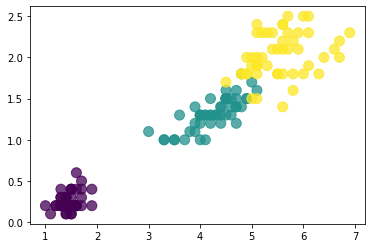

In [6]:
plt.scatter(X[:,2],X[:,3],c=y,s=100,alpha=0.75)
plt.show()

In [7]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [8]:
model=make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))

In [9]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [10]:
params={
    'polynomialfeatures__degree':[2,3,4],
    'sgdclassifier__alpha':[0.0001,0.001,0.01,0.1,1,10],
    'sgdclassifier__penalty':['l1','l2','elasticnet'],
    'sgdclassifier__loss':['hinge', 'log', 'modified_huber', 'squared_hinge'],
    'sgdclassifier__max_iter':[100,1000]
}

In [11]:
grille=GridSearchCV(model,param_grid=params,cv=4)

In [12]:
grille.fit(Xtrain,ytrain)

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge'],
                         'sgdclassifier__max_iter': [100, 1000],
                         'sgdclassifier__penalty': ['l1', 'l2', 'elasticnet']})

In [13]:
grille.best_params_

{'polynomialfeatures__degree': 3,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 100,
 'sgdclassifier__penalty': 'l1'}

In [14]:
grille.score(Xtest,ytest)

0.9736842105263158

In [15]:
model2=make_pipeline(PolynomialFeatures(),MinMaxScaler(),SGDClassifier(random_state=0))

In [16]:
grille=GridSearchCV(model2,param_grid=params,cv=4)

In [17]:
grille.fit(Xtrain,ytrain)

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge'],
                         'sgdclassifier__max_iter': [100, 1000],
                         'sgdclassifier__penalty': ['l1', 'l2', 'elasticnet']})

In [18]:
grille.best_params_

{'polynomialfeatures__degree': 4,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__loss': 'log',
 'sgdclassifier__max_iter': 100,
 'sgdclassifier__penalty': 'elasticnet'}

In [19]:
grille.score(Xtest,ytest)

0.9210526315789473

In [20]:
model3=make_pipeline(PolynomialFeatures(),RobustScaler(),SGDClassifier(random_state=0))

In [21]:
grille=GridSearchCV(model3,param_grid=params,cv=4)
grille.fit(Xtrain,ytrain)


/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('robustscaler', RobustScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge'],
                         'sgdclassifier__max_iter': [100, 1000],
                         'sgdclassifier__penalty': ['l1', 'l2', 'elasticnet']})

In [22]:
grille.score(Xtest,ytest)

0.9736842105263158

In [23]:
grille.best_params_

{'polynomialfeatures__degree': 4,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__loss': 'log',
 'sgdclassifier__max_iter': 100,
 'sgdclassifier__penalty': 'l2'}

In [24]:
model4=make_pipeline(PolynomialFeatures(),StandardScaler(),RidgeClassifierCV(alphas=(0.1, 1.0, 10.0,100.0)))

In [25]:
params={
    'polynomialfeatures__degree':[2,3,4,5],
}

In [26]:
grille=GridSearchCV(model4,param_grid=params,cv=4)

In [27]:
grille.fit(Xtrain,ytrain)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridgeclassifiercv',
                                        RidgeClassifierCV(alphas=array([  0.1,   1. ,  10. , 100. ])))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4, 5]})

In [28]:
grille.best_params_

{'polynomialfeatures__degree': 4}

In [29]:
grille.score(Xtest,ytest)

0.9736842105263158

In [30]:
import seaborn as sns

In [31]:
titanic=sns.load_dataset('titanic')

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
y=titanic['survived']

In [34]:
X=titanic.drop('survived',axis=1)

In [35]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [36]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [39]:
car_numeriques=['pclass','age','fare']
car_categoriques=['sex','deck','alone']
pipeline_numerique=make_pipeline(SimpleImputer(),StandardScaler()) 
#remplace les manquant et permet de normaliser les var numériques
pipeline_categorique=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder()) 
#remplace les manquants par les plus fréquents et fait passer un onehotencoder sur les var catégoriques

In [40]:
preprocesseur=make_column_transformer((pipeline_numerique,car_numeriques),(pipeline_categorique,car_categoriques))

In [41]:
model5=make_pipeline(preprocesseur,SGDClassifier())
model5.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  

In [42]:
from sklearn.compose import make_column_selector

In [43]:
car_numeriques=make_column_selector(dtype_include=np.number)
#ne fonctionne qu'avec sklearn 0.22 et permet de sélectionner les colonnes numériques
car_categoriques=make_column_selector(dtype_exclude=np.number)
#ici on exclut les colonnes numériques donc on sélectionne les colonnes catégoriques
pipeline_numerique=make_pipeline(SimpleImputer(),StandardScaler()) 
#remplace les manquant et permet de normaliser les var numériques
pipeline_categorique=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder()) 
#remplace les manquans par les plus fréquents et fait passer un onehotencoder sur les var catégoriques

In [44]:
preprocesseur=make_column_transformer((pipeline_numerique,car_numeriques),(pipeline_categorique,car_categoriques))

In [45]:
model6=make_pipeline(preprocesseur,SGDClassifier())
model6.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff419d57ca0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [46]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [47]:
model6.score(X,y)

1.0

In [48]:
X=titanic[['pclass','age']]

In [49]:
y=titanic['survived']

In [50]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [51]:
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

In [52]:
model7=make_pipeline(KNNImputer(),SGDClassifier())

In [53]:
params7={'knnimputer__n_neighbors':[1,2,3,4,5]}

In [54]:
grille7=GridSearchCV(model7,param_grid=params7,cv=5)

In [55]:
grille7.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4, 5]})

In [56]:
grille7.best_params_

{'knnimputer__n_neighbors': 4}

In [57]:
grille7.best_score_

0.6557513185949949

In [58]:
Xtrain

,pclass,age
135,2,23.0
276,3,45.0
414,3,44.0
597,3,49.0
823,3,27.0
...,...,...
721,3,17.0
876,3,20.0
107,3,NaN
341,1,24.0


In [59]:
grille7.score(Xtest,ytest)

0.6457399103139013

In [60]:
imputer=KNNImputer(n_neighbors=3)

In [61]:
imputer.fit_transform(X)

array([[ 3.        , 22.        ],
       [ 1.        , 38.        ],
       [ 3.        , 26.        ],
       ...,
       [ 3.        , 27.66666667],
       [ 1.        , 26.        ],
       [ 3.        , 32.        ]])

In [62]:
#reprenons tout avec ces exemples
X=titanic.drop('survived',axis=1)
y=titanic['survived']

In [63]:
car_numeriques=make_column_selector(dtype_include=np.number)
#ne fonctionne qu'avec sklearn 0.22 et permet de sélectionner les colonnes numériques
car_categoriques=make_column_selector(dtype_exclude=np.number)
#ici on exclut les colonnes numériques donc on sélectionne les colonnes catégoriques
pipeline_numerique=make_pipeline(KNNImputer(n_neighbors=3),StandardScaler()) 
#remplace les manquant et permet de normaliser les var numériques
pipeline_categorique=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder()) 
#remplace les manquants par les plus fréquents et fait passer un onehotencoder sur les var catégoriques

In [64]:
preprocesseur=make_column_transformer((pipeline_numerique,car_numeriques),(pipeline_categorique,car_categoriques))

In [65]:
model6=make_pipeline(preprocesseur)
Xbis=model6.fit_transform(X,y)

In [66]:
Xbis

array([[ 0.82737724, -0.58849894,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.60040522,  0.43279337, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.2912729 , -0.4745452 , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.34081058,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.2912729 , -0.4745452 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.15456616, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

In [67]:
Xtrain,Xtest,ytrain,ytest=train_test_split(Xbis,y)

In [68]:
Xtrain

array([[-0.36936484, -0.14265988,  0.43279337, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.81141848, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.9600315 ,  2.24747049, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.56610693,  0.89763126, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.29079476, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.39034825, -0.4745452 , ...,  1.        ,
         0.        ,  1.        ]])

In [69]:
model8=make_pipeline(PolynomialFeatures(),SGDClassifier(random_state=0))

In [70]:
params8={
    'polynomialfeatures__degree':[2,3],
    'sgdclassifier__alpha':[0.1,1],
    'sgdclassifier__penalty':['l1','l2','elasticnet'],
    'sgdclassifier__loss':['hinge', 'log', 'modified_huber', 'squared_hinge'],
    'sgdclassifier__max_iter':[100]
}

In [71]:
grille8=GridSearchCV(model8,param_grid=params8,cv=5)

In [72]:
grille8.fit(Xtrain,ytrain)

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of itera

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3],
                         'sgdclassifier__alpha': [0.1, 1],
                         'sgdclassifier__loss': ['hinge', 'log',
                                                 'modified_huber',
                                                 'squared_hinge'],
                         'sgdclassifier__max_iter': [100],
                         'sgdclassifier__penalty': ['l1', 'l2', 'elasticnet']})

In [73]:
grille8.best_params_

{'polynomialfeatures__degree': 2,
 'sgdclassifier__alpha': 0.1,
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 100,
 'sgdclassifier__penalty': 'l1'}

In [74]:
grille8.score(Xtest,ytest)

1.0